### Notebook for the manual annotation of cell states for all skin

- **Developed by:** Carlos Talavera-López Ph.D
- **Würzburg Institute for Systems Immunology & Julius-Maximilian-Universität Würzburg**
- v230706

### Import required modules

In [1]:
import anndata
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from SCCAF import SCCAF_assessment, plot_roc

### Set up working environment

In [2]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 180, color_map = 'RdPu', dpi_save = 300, vector_friendly = True, format = 'svg')

-----
anndata     0.8.0
scanpy      1.9.2
-----
PIL                 9.4.0
SCCAF               NA
appnope             0.1.3
asttokens           NA
backcall            0.2.0
cffi                1.15.1
colorama            0.4.6
comm                0.1.2
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.6
decorator           5.1.1
executing           1.2.0
h5py                3.8.0
igraph              0.10.4
importlib_resources NA
ipykernel           6.21.2
jedi                0.18.2
joblib              1.2.0
kiwisolver          1.4.4
leidenalg           0.9.1
llvmlite            0.39.1
louvain             0.8.0
matplotlib          3.7.0
mpl_toolkits        NA
natsort             8.2.0
numba               0.56.4
numexpr             2.8.4
numpy               1.23.5
packaging           23.0
pandas              1.5.3
parso               0.8.3
patsy               0.5.3
pexpect             4.8.0
pickleshare         0.7.5
pkg_resources       NA
p

### Read in Human skin dataset

In [3]:
adata_skin = sc.read_h5ad('../data/SCC0120_1_Skin_scANVI_states_ctl230706.h5ad') 
adata_skin

AnnData object with n_obs × n_vars = 7479 × 27449
    obs: 'sample_id', 'Status', 'Site', 'Tissue', 'Location', 'donor_id', 'Sex', 'full_clustering', 'seed_labels', 'donor', 'cell_states', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'nCount_CITE', 'nFeature_CITE', 'nCount_PROT', 'nFeature_PROT', 'percent.mt', 'sample', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'tissue', 'condition', 'n_genes', 'doublet_scores', 'hashtag', 'unique', 'group', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'skin_condition'
    var: 'gene_ids-SCC0120_1_skin', 'feature_types-SCC0120_1_skin', 'mt-SCC0120_1_skin', 'ribo-SCC0120_1_skin', 'n_cells_by_counts-SCC0120_1_skin', 'mean_counts-SCC0120_1_skin', 'pct_dropout_by_counts-SCC0120_1_sk

### Visualise manifold with `scANVI` annotation

/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No d

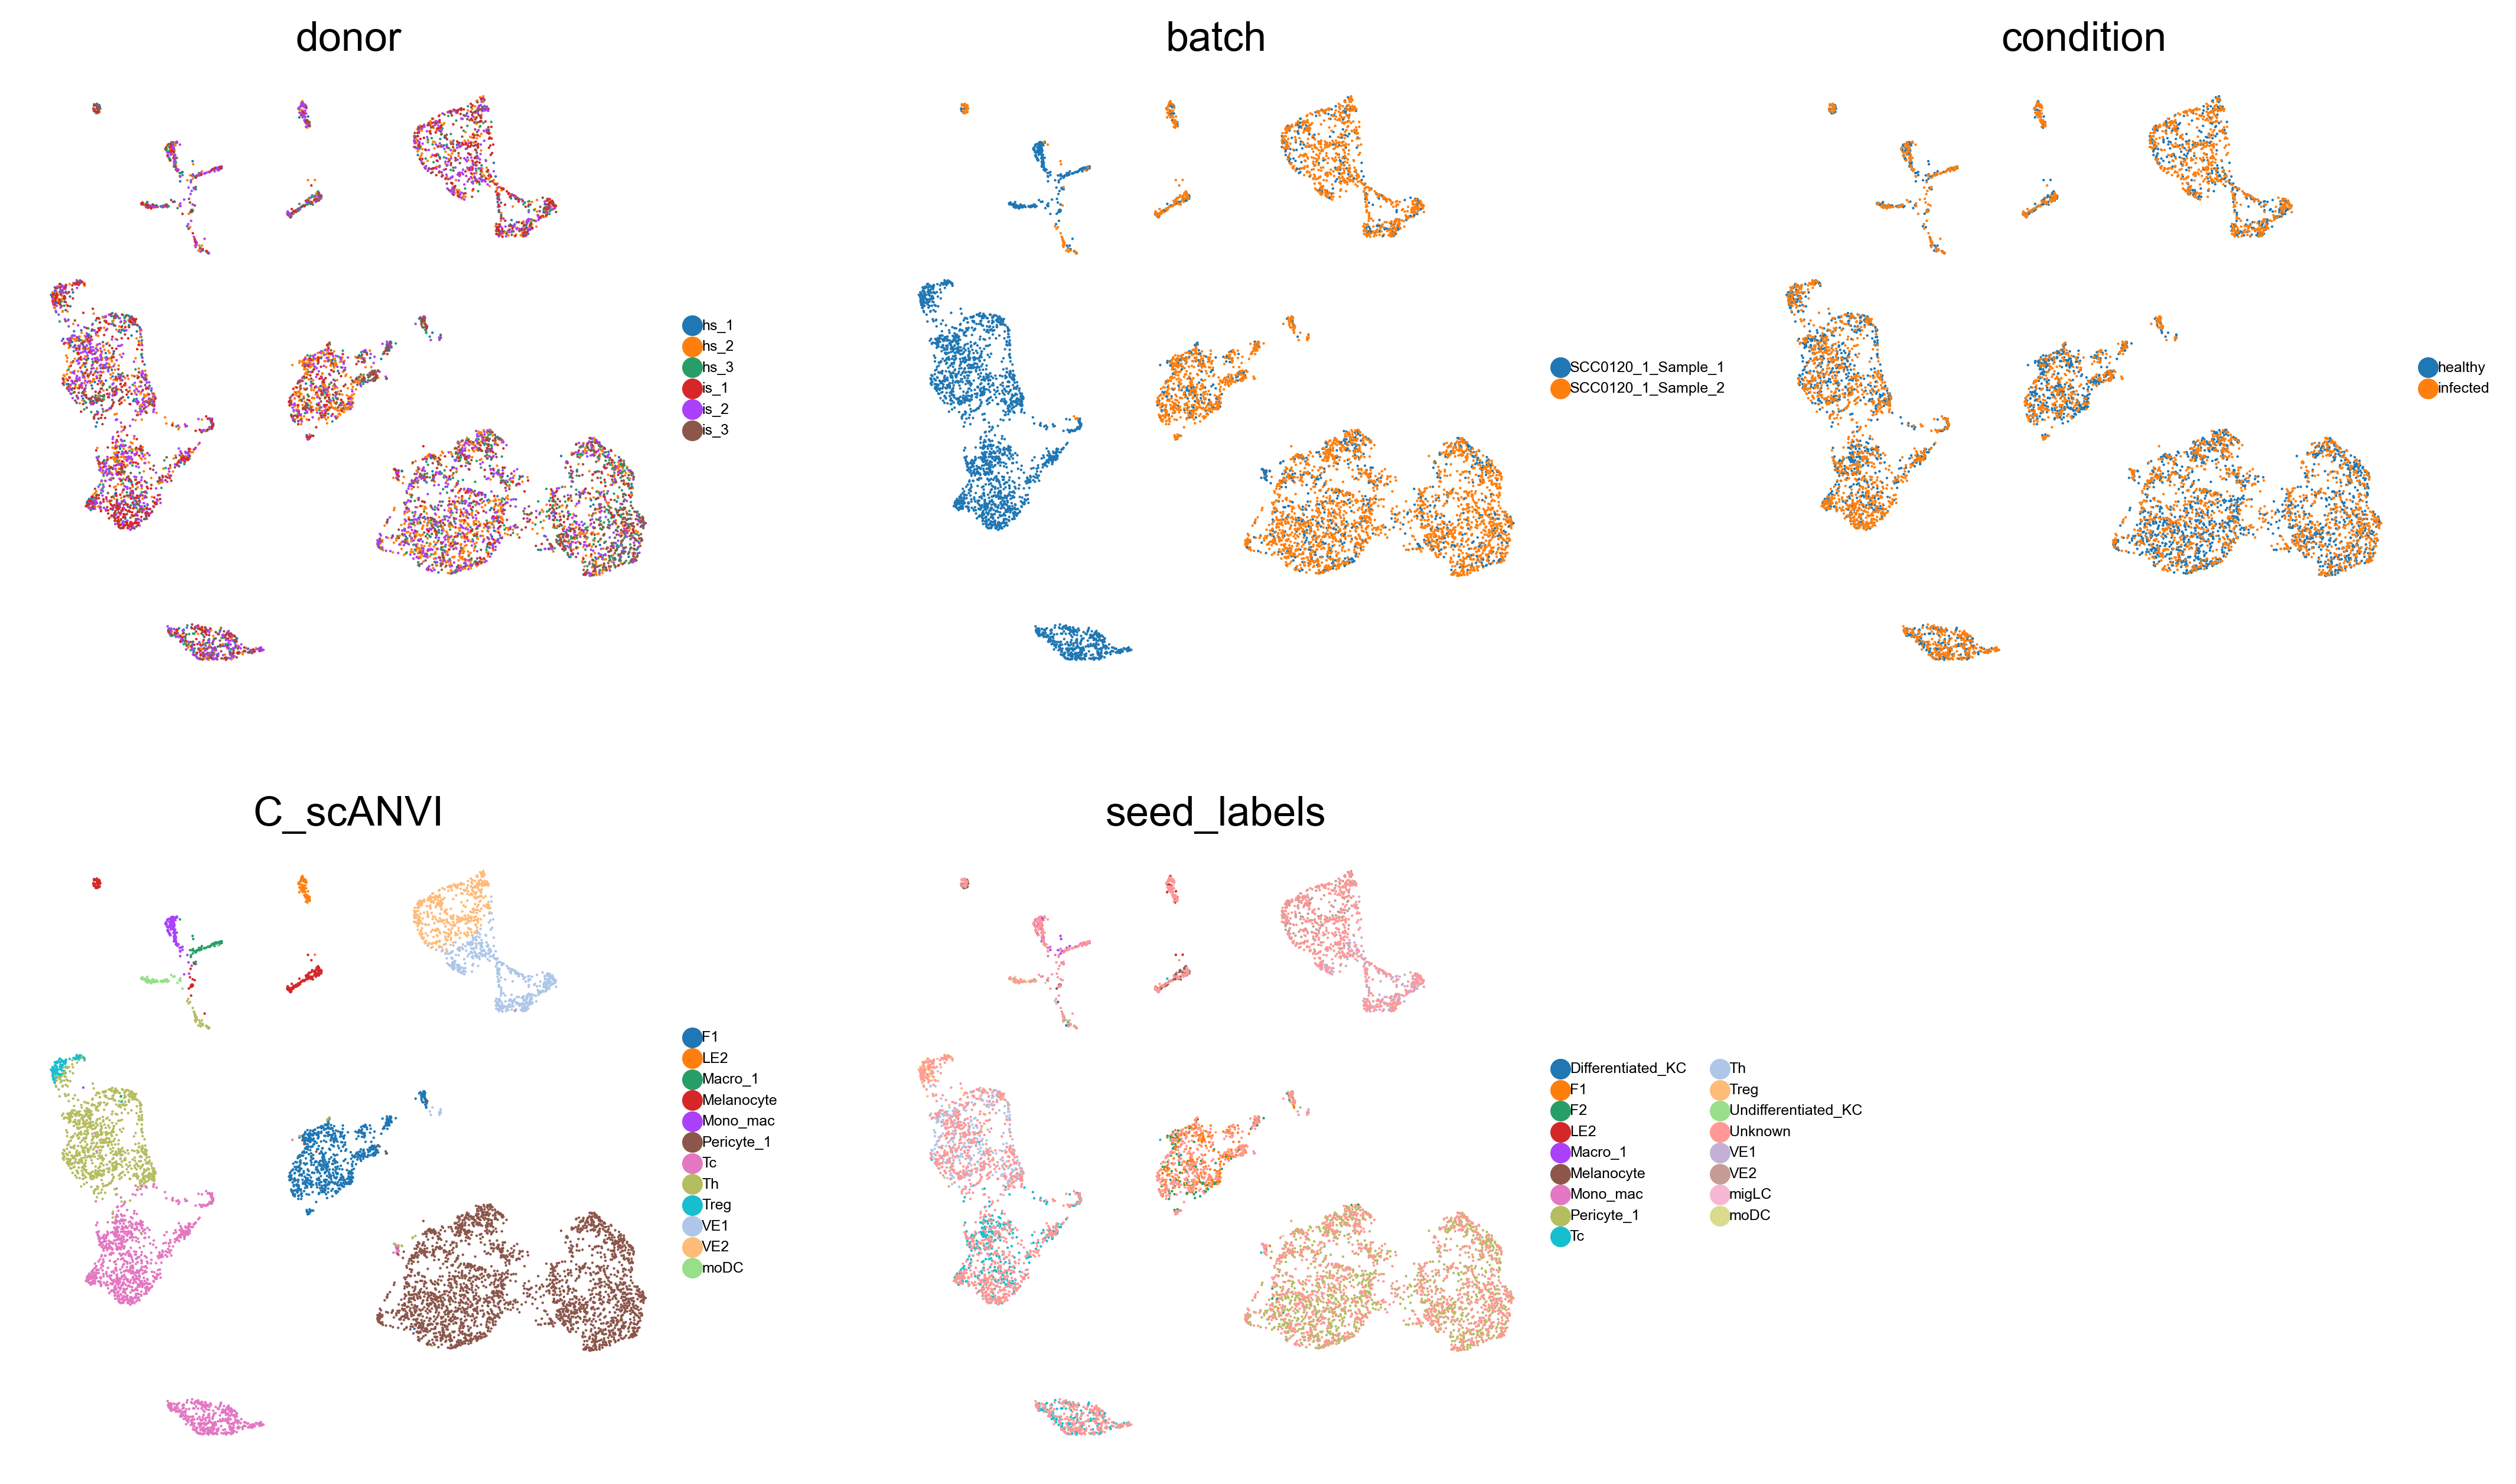

In [5]:
sc.pl.umap(adata_skin, frameon = False, color = ['donor', 'batch', 'condition', 'C_scANVI', 'seed_labels'], size = 3, legend_fontsize = 5, ncols = 3)

In [6]:
del(adata_skin.obs['seed_labels'])
adata_skin.obs['cell_type'] = adata_skin.obs['C_scANVI'].copy()

### Cluster manifold using `leiden`

In [8]:
sc.pp.neighbors(adata_skin, use_rep = "X_scANVI", n_neighbors = 50, metric = 'minkowski')
sc.tl.leiden(adata_skin, resolution = 1, random_state = 1712)

computing neighbors


/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:15)
running Leiden clustering
    finished: found 24 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)


In [ ]:
sc.pl.umap(adata_skin, frameon = False, color = ['donor', 'batch', 'condition', 'C_scANVI', 'leiden'], size = 3, legend_fontsize = 5, ncols = 3, cmap = 'tab20')

### Evaluate clustering accuracy with `SCCAF`

In [ ]:
y_prob, y_pred, y_test, clf, cvsm, acc = SCCAF_assessment(BrEpit_ALL.X, BrEpit_ALL.obs['leiden'], n = 300)

In [ ]:
plot_roc(y_prob, y_test, clf, cvsm = cvsm, acc = acc)
plt.rcParams["figure.figsize"] = (16,6)
plt.show()

In [ ]:
sc.settings.set_figure_params(dpi = 180, color_map = 'RdPu', dpi_save = 300, vector_friendly = True, format = 'svg')

In [ ]:
BrEpit_ALL

### Rename cluster based on the cell type annotation

In [ ]:
sc.pl.umap(BrEpit_ALL, frameon = False, color = ['cell_type'], groups = 'Multiciliated', size = 1, legend_fontsize = 5, ncols = 3, legend_loc = 'on data')

In [ ]:
sc.pl.umap(BrEpit_ALL, frameon = False, color = ['leiden', 'cell_type'], size = 1, legend_fontsize = 5, ncols = 3, legend_loc = 'on data')

In [ ]:
BrEpit_ALL.obs['leiden'].cat.categories

In [ ]:
BrEpit_ALL.obs['leiden_states'] = BrEpit_ALL.obs['leiden']
BrEpit_ALL.obs['leiden_states'].cat.categories = ['Goblet_0', 'Club_1', 'SupraB_2', 'Basal_3', 'SupraB_4', 'SupraB_5', 'Goblet_6', 'Goblet_7', 'Basal_8', 'Club_9', 'MultiC_10', 'Mixed_11', 'Mixed_12',
       'Mixed_13', 'SupraB_14', 'SupraB_15', 'Mixed_16', 'Mixed_17', 'Club_18']
sc.pl.umap(BrEpit_ALL, frameon = False, color = ['leiden', 'cell_type', 'leiden_states'], size = 1, legend_fontsize = 5, ncols = 3, legend_loc = 'on data')

In [ ]:
sc.pl.umap(BrEpit_ALL, frameon = False, color = ['cell_type', 'leiden_states'], size = 1, legend_fontsize = 5, ncols = 2)

### Calculate cluster-specific marker genes using _Wilcoxon's Rank Sum Test_

In [ ]:
BrEpit_ALL_log = BrEpit_ALL.copy()
BrEpit_ALL_log

In [ ]:
sc.pp.normalize_total(BrEpit_ALL_log, target_sum = 1e6, exclude_highly_expressed = True)
sc.pp.log1p(BrEpit_ALL_log)

In [ ]:
sc.tl.rank_genes_groups(BrEpit_ALL_log, 'leiden_states', method = 'wilcoxon', n_genes = 100, use_raw = False)
result = BrEpit_ALL_log.uns['rank_genes_groups']
groups = result['names'].dtype.names
wilcox_markers = pd.DataFrame(
{group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names','logfoldchanges', 'pvals_adj']})
wilcox_markers.head(10)

In [ ]:
wilcox_markers.to_csv('/Users/cartalop/github/COPD_influenza/4-clustering_of_cell_states/Marburg_All_ctl230404_leiden_states_WilcoxRST_markers.csv', sep = ',', index = False)

### Export annotated object

In [ ]:
BrEpit_ALL

In [ ]:
BrEpit_ALL.write('../data/Marburg_All_ctl230404_leiden_states.raw.h5ad')

In [ ]:
sc.pl.umap(BrEpit_ALL_log, frameon = False, color = ['leiden_states', 'STEAP4', 'CEP55', 'FOXJ1', 'PIGR', 'SERPINE2', 'ADM2', 'WNT10A'], size = 1, legend_fontsize = 5, ncols = 4, legend_loc = 'on data')